In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import pandas as pd

In [2]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [4]:
!jt -r

Reset css and font defaults in:
C:\Users\mdieg\.jupyter\custom &
C:\Users\mdieg\AppData\Roaming\jupyter\nbextensions


In [3]:
sed = ascii.read('Si_break.norm_LIR')

In [4]:
z = 3.76 #https://iopscience.iop.org/article/10.3847/1538-4357/abb599
#https://www.aanda.org/articles/aa/abs/2022/07/aa42172-21/aa42172-21.html

In [5]:
lam_tab = sed['col1']  * 10.0**(-4.0)   # microns
Llam_tab = sed['col2']  # erg/s/Angstrom
nu_tab = 3.0*10.0**8.0/(lam_tab*10.0**(-6.0))   # Hz
Lnu_tab = Llam_tab/nu_tab**2.0    # erg/s/Hz but with arbitrary normalization

(1e-37, 1e-30)

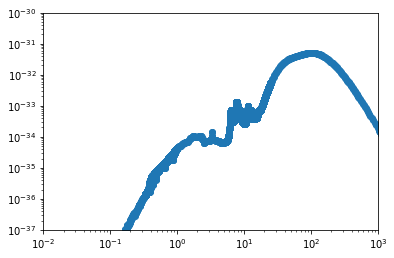

In [6]:
plt.scatter(lam_tab,Lnu_tab)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,1000)
plt.ylim(1e-37,1e-30)

In [7]:
lam_tab_z = lam_tab*(z+1)

(0.1, 1000)

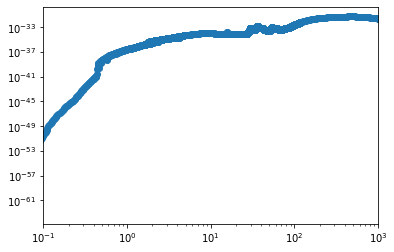

In [8]:
plt.scatter(lam_tab_z,Lnu_tab)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,1000)

In [9]:
nu_tab_z = 3.0*10.0**8.0/(lam_tab_z*10.0**(-6.0))

In [10]:
my_phot = np.asarray(pd.read_csv('Phot_Ext_Sers_4.csv', header = None))
my_phot

array([[5.60000000e+00, 4.34978342e+01, 6.37190269e+00],
       [7.70000000e+00, 8.56339155e+01, 1.24470823e+01],
       [1.00000000e+01, 1.01170694e+02, 1.51759605e+01],
       [1.28000000e+01, 6.18713767e+01, 1.27797307e+01],
       [1.50000000e+01, 6.59951096e+01, 1.15050995e+01],
       [1.80000000e+01, 5.94062260e+01, 1.26578738e+01],
       [2.78600000e+00, 5.89305348e+00, 1.91134399e+00],
       [3.56300000e+00, 1.77931614e+01, 3.59485636e+00],
       [4.42100000e+00, 1.95448840e+01, 5.75861871e+00],
       [2.50000000e+02, 7.30000000e+04, 1.20000000e+04],
       [3.50000000e+02, 1.14000000e+05, 1.40000000e+04],
       [5.00000000e+02, 1.16000000e+05, 1.50000000e+04]])

In [11]:
my_phot = np.reshape(my_phot,(36))

In [12]:
my_phot_array_lam = np.array(my_phot[::3])
my_phot_array_flux = np.array(my_phot[1::3])*1e-29 #convert to ergs per sec per cm^2 per Hz

my_phot_array_lam

array([  5.6  ,   7.7  ,  10.   ,  12.8  ,  15.   ,  18.   ,   2.786,
         3.563,   4.421, 250.   , 350.   , 500.   ])

In [13]:
my_phot_array_flux

array([4.34978342e-28, 8.56339154e-28, 1.01170694e-27, 6.18713767e-28,
       6.59951096e-28, 5.94062260e-28, 5.89305348e-29, 1.77931614e-28,
       1.95448840e-28, 7.30000000e-25, 1.14000000e-24, 1.16000000e-24])

In [14]:
#def find_nearest(array, value):
    #array = np.asarray(array)
    #idx = (np.abs(array - value)).argmin()
    #return array[idx]

In [15]:
lam_sed_indexes = []

for i in my_phot_array_lam:
    lam_sed_indexes.append((np.abs(lam_tab_z - i)).argmin())

lam_sed_indexes = np.array(lam_sed_indexes)
sed_phot_lum  = np.array(Lnu_tab[lam_sed_indexes])

sed_phot_lum

array([5.69799461e-35, 9.16224491e-35, 1.04211519e-34, 7.17554886e-35,
       7.96107213e-35, 7.61427368e-35, 1.14579671e-35, 2.17137058e-35,
       3.35888279e-35, 3.55105157e-32, 4.52215786e-32, 5.03599812e-32])

In [16]:
sed_phot_lum_k = sed_phot_lum*8915023.972527752
sed_phot_lum_k

array([5.07977585e-28, 8.16816330e-28, 9.29048192e-28, 6.39701901e-28,
       7.09731489e-28, 6.78814324e-28, 1.02148051e-28, 1.93578208e-28,
       2.99445206e-28, 3.16577099e-25, 4.03151458e-25, 4.48960439e-25])

In [17]:
my_phot_array_flux/sed_phot_lum_k

array([0.85629436, 1.04838643, 1.08897143, 0.96719076, 0.92986024,
       0.87514691, 0.57691296, 0.91917172, 0.65270319, 2.30591538,
       2.82772139, 2.58374658])

In [18]:
lam_sed_indexes

array([ 6374,  6396,  6421,  6450,  6473,  6505,  2878,  4510,  6313,
       10796, 10811, 10826], dtype=int64)

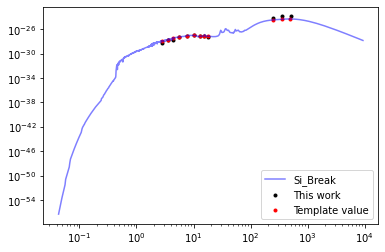

In [19]:
plt.plot(lam_tab_z,Lnu_tab*8915023.972527752,color='blue',alpha=.5,label='Si_Break',linestyle = '-')
plt.scatter(my_phot_array_lam,my_phot_array_flux,color='black',label='This work',marker=".")
plt.scatter(lam_tab_z[lam_sed_indexes],Lnu_tab[lam_sed_indexes]*8915023.972527752,color='red',label='Template value',marker=".")
#plt.xlim(0,20)
#plt.ylim(0,400)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

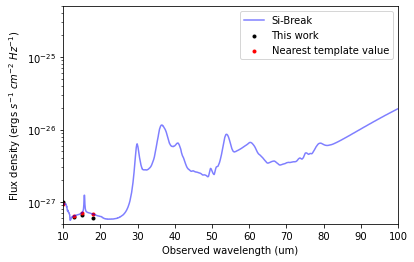

In [23]:
plt.plot(lam_tab_z,Lnu_tab*8915023.972527752,color='blue',alpha=.5,label='Si-Break',linestyle = '-')
plt.scatter(my_phot_array_lam,my_phot_array_flux,color='black',label='This work',marker=".")
plt.scatter(lam_tab_z[lam_sed_indexes],Lnu_tab[lam_sed_indexes]*8915023.972527752,color='red',label='Nearest template value',marker=".")
plt.xlim(10,100)
plt.ylim(5e-28,5e-25)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Observed wavelength (um)')
plt.ylabel('Flux density (ergs $s^{-1}$ $cm^{-2}$ $Hz^{-1}$)')
plt.legend()
plt.show()

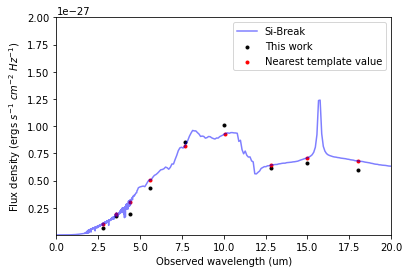

In [52]:
plt.plot(lam_tab_z,Lnu_tab*8915023.972527752,color='blue',alpha=.5,label='Si-Break',linestyle = '-')
plt.scatter(my_phot_array_lam,my_phot_array_flux,color='black',label='This work',marker=".")
plt.scatter(lam_tab_z[lam_sed_indexes],Lnu_tab[lam_sed_indexes]*8915023.972527752,color='red',label='Nearest template value',marker=".")
plt.xlim(0,20)
plt.ylim(1e-30,2e-27)
plt.xlabel('Observed wavelength (um)')
plt.ylabel('Flux density (ergs $s^{-1}$ $cm^{-2}$ $Hz^{-1}$)')
plt.legend()
plt.show()


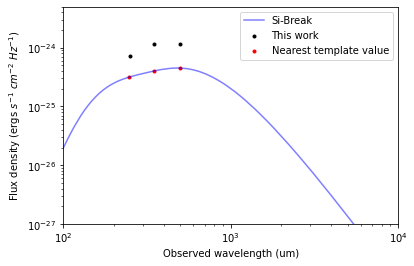

In [53]:
plt.plot(lam_tab_z,Lnu_tab*8915023.972527752,color='blue',alpha=.5,label='Si-Break',linestyle = '-')
plt.scatter(my_phot_array_lam,my_phot_array_flux,color='black',label='This work',marker=".")
plt.scatter(lam_tab_z[lam_sed_indexes],Lnu_tab[lam_sed_indexes]*8915023.972527752,color='red',label='Nearest template value',marker=".")
plt.xlim(100,10000)
plt.ylim(1e-27,5e-24)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Observed wavelength (um)')
plt.ylabel('Flux density (ergs $s^{-1}$ $cm^{-2}$ $Hz^{-1}$)')
plt.legend()
plt.show()

In [56]:
sed1 = ascii.read('Warm_SF_glx.norm_LIR')

In [57]:
lam_tab1 = sed1['col1']  * 10.0**(-4.0)   # microns
Llam_tab1 = sed1['col2']  # erg/s/Angstrom
nu_tab1 = 3.0*10.0**8.0/(lam_tab1*10.0**(-6.0))   # Hz
Lnu_tab1 = Llam_tab1/nu_tab1**2.0    # erg/s/Hz but with arbitrary normalization

In [58]:
lam_tab_z1 = lam_tab1*(z+1)

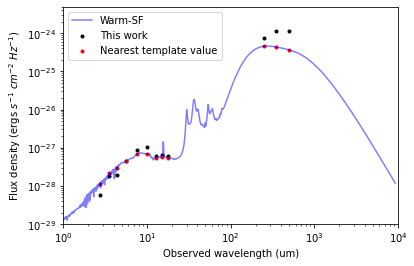

In [60]:
plt.plot(lam_tab_z1,Lnu_tab1*11108470.191008175,color='blue',alpha=.5,label='Warm-SF',linestyle = '-')
plt.scatter(my_phot_array_lam,my_phot_array_flux,color='black',label='This work',marker=".")
plt.scatter(lam_tab_z1[lam_sed_indexes],Lnu_tab1[lam_sed_indexes]*11108470.191008175,color='red',label='Nearest template value',marker=".")
plt.xlim(1,10000)
plt.ylim(1e-29,5e-24)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Observed wavelength (um)')
plt.ylabel('Flux density (ergs $s^{-1}$ $cm^{-2}$ $Hz^{-1}$)')
plt.show()

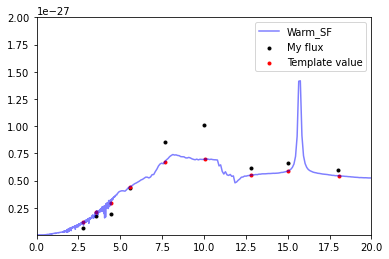

In [22]:
plt.plot(lam_tab_z1,Lnu_tab1*11108470.191008175,color='blue',alpha=.5,label='Warm_SF',linestyle = '-')
plt.scatter(my_phot_array_lam,my_phot_array_flux,color='black',label='My flux',marker=".")
plt.scatter(lam_tab_z1[lam_sed_indexes],Lnu_tab1[lam_sed_indexes]*11108470.191008175,color='red',label='Template value',marker=".")
plt.xlim(0,20)
plt.ylim(1e-30,2e-27)
plt.legend()
plt.show()

In [62]:
from numpy import loadtxt

In [63]:
log_SFR_data = np.array(loadtxt('logmagcorrectedSFR_300.txt'))
log_stellarmass_data = np.array(loadtxt('logmagcorrectedstellarmass_300.txt'))

In [70]:
mean_log_SFR = np.average(log_SFR_data)
mean_log_stellarmass = np.average(log_stellarmass_data)
err_log_SFR = np.std(log_SFR_data)
err_log_stellarmass = np.std(log_stellarmass_data)

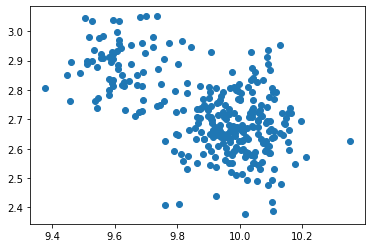

In [65]:
plt.scatter(log_stellarmass_data,log_SFR_data)

In [78]:
import astropy
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
import math

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<ErrorbarContainer object of 3 artists>

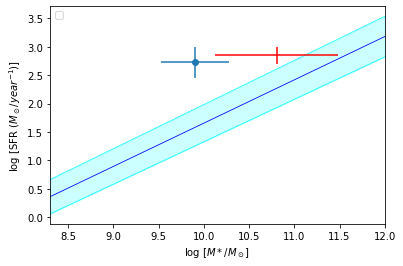

In [88]:
cosmo = FlatLambdaCDM(H0=67, Om0=0.3)
time = cosmo.age(z).value
log_Ms = np.linspace(8.3,12,1000)
log_SFRms = (0.80 - 0.022*(time))*log_Ms - (6.09 - 0.07*(time))
max_log_SFRms = (0.82 - 0.025*time)*log_Ms - (5.86 - 0.04 * time)
min_log_SFRms = (0.78 - 0.019 *time)*log_Ms - (6.32 - 0.1 * time)
plt.plot(log_Ms,log_SFRms,lw = 0.8,c='blue')
plt.plot(log_Ms,max_log_SFRms, lw = 0.7,c='cyan')
plt.plot(log_Ms,min_log_SFRms,lw = 0.7 ,c='cyan')
plt.fill_between(log_Ms,max_log_SFRms,min_log_SFRms,color = 'cyan' , alpha = 0.2)
plt.legend()
plt.xlabel("log [$M*/M_\odot$]")
plt.ylabel("log [SFR (${M_\odot}/year^{-1}$)]")
#plt.title("Galaxy Main Sequence")
plt.legend()
plt.xlim(8.3,12)
plt.scatter(mean_log_stellarmass,mean_log_SFR)
plt.errorbar(x = mean_log_stellarmass,y = mean_log_SFR, xerr = 2*err_log_stellarmass, yerr = 2*err_log_SFR)
plt.errorbar(x = math.log10(4.2e11/6.6), y = math.log10(4630/6.6), xerr = (1e11)/(((4.2e11)/6.6)*math.log(10)), yerr = 230/((4630/6.6)*math.log(10)), color = 'red')